# Índice de Climático de Incêndio Florestal (FWI)

### Uma abordagem de mineração de dados para prever incêndios florestais usando dados meteorológicos.

  
 ### Do conjunto de dados
  
  O Forest Fire Weather Index (FWI) é o sistema canadense de classificação de risco de incêndio e inclui seis preisões:


1. Os três primeiros estão relacionados às condições climáticas propícias para gerar o combustível: 

             |Código Umidade Combustível(FFMC)-->influencia a propagação de ignição e incêndio. 
       
             |Código de Umidade(DMC) --> afeta intensidade do fogo.
            
             |Código de Seca(DC) --> afeta intensidade do fogo.
                
                       
2. Índices de comportamento de fogo

            |Índice Inicial de Propagação(ISI) -->pontuação que se correlaciona com a propagação da velocidade do fogo. 
            
            |Índice de acumulação(BUI) --> representa a quantidade de combustível disponível
            
           
 #### Com todos estes dados, temos então o Forest Fire Weather Index FWI.






Fonte: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
    
1. Título: Incêndios florestais

2. Fontes
   Criado por: Paulo Cortez e An bal Morais (Univ. Minho) @ 2007
   
5. Número de Instâncias: 517

6. Número de Atributos: 12 + atributo de saída
  
   Nota: vários dos atributos podem ser correlacionados, portanto, faz sentido aplicar algum tipo de seleção de recursos.

 Informações sobre atributos:

   #### 1. Coordenada espacial do eixo xx no mapa do parque de Montesinho: 1 a 9
   #### 2. Coordenadas espaciais do eixo Y no eixo do mapa do parque de Montesinho: 2 a 9
   #### 3. mês - mês do ano: "jan" a "dez"
   #### 4. dia - dia da semana
   #### 5. FFMC - índice FFMC do sistema FWI: 18,7 a 96,20
   #### 6. DMC - índice DMC do sistema FWI: 1.1 a 291.3
   #### 7. DC - DC index do sistema FWI: 7,9 a 860,6
   #### 8. ISI - índice ISI do sistema FWI: 0.0 a 56.10
   #### 9. temp - temperatura em graus Celsius: 2,2 a 33,30
   #### 10. UR - umidade relativa em%: 15,0 a 100
   #### 11. vento - velocidade do vento em km / h: 0.40 a 9.40
   #### 12. chuva - chuva externa em mm / m2: 0.0 a 6.4
   #### 13. área - a área queimada da floresta (em ha): 0.00 a 1090.84
   ( Existem 247 amostras com valor zero para o atributo “area”, isto significa que uma área menor que 1ha / 100 = 100m2 foi queimada).
   
7. Atributos ausentes: Nenhum
  


In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pl
import seaborn as sb

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering


from sklearn.cluster import KMeans

In [4]:
dataset = pd.read_csv("forestfires_mod.csv")
X = dataset [[ "X","Y","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area" ]]
Y = dataset[["month"]]
X

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [5]:
#Quantos registros e atributos tem a base de dados?
print(dataset.shape)
print("Essa base contém: %s objetos e %s atributos" %(dataset.shape[0], dataset.shape[1]))

(517, 13)
Essa base contém: 517 objetos e 13 atributos


In [6]:
print(dataset.dtypes)


X          int64
Y          int64
month    float64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [7]:
dataset.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,516.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.482558,3.972921,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.273034,2.143867,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


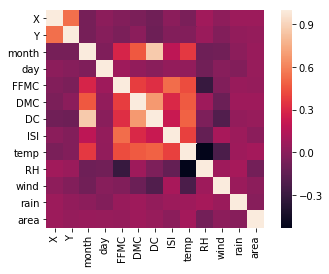

In [8]:
datasetA = dataset[['X','Y','month',"day",'FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']] 
cor = datasetA.corr() 
sb.heatmap(cor, square = True)

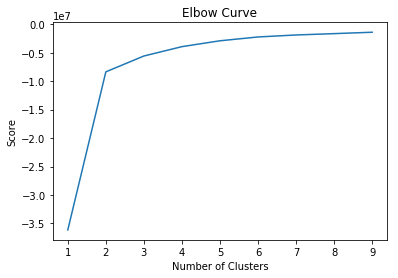

In [9]:
Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [10]:
kmeans=KMeans(n_clusters= 3)

kmeansoutput=kmeans.fit(X)

kmeansoutput.labels_



array([1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,

In [11]:
#X.values[np.where(kmeansoutput.labels_ == 1)] 
Y.values[np.where(kmeansoutput.labels_ == 1)] 


array([[ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [nan],
       [ 6.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 3.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 3.],
       [ 1.],
       [ 3.],
      

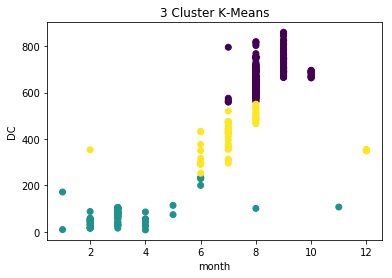

In [12]:
pl.figure('3 Cluster K-Means')

pl.scatter(datasetA ["month"],datasetA ["DC"], c=kmeansoutput.labels_.astype(float))

pl.xlabel('month')

pl.ylabel('DC')

pl.title('3 Cluster K-Means')

pl.show()
